In [3]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [4]:
import numpy as np
import pandas as pd

In [5]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [6]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

In [7]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [8]:
# reflect an existing database into a new model
Base = automap_base()
Base.prepare(engine, reflect=True)

# reflect the tables

In [9]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [10]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [11]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [12]:
inspector = inspect(engine)

In [13]:
columns = inspector.get_columns('Measurement')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [14]:
columns = inspector.get_columns('Station')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [15]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

#date_str = "10"
session.query(Measurement.date).\
    filter(Measurement.date < "2017-08-23").\
    order_by(Measurement.date)

In [16]:
# TODO: Look at this afer the end of the assignment. Calculate the date 1 year ago from the last data point in the database
# Done! Perform a query to retrieve the data and precipitation scores

date = dt.datetime(2016, 8, 22)
yearprecip = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date > date).\
    order_by(Measurement.date).all()

#yearprecip

In [17]:
# Save the query results as a Pandas DataFrame and set the index to the date column
# Sort the dataframe by date
yearprecip_df = pd.DataFrame(yearprecip, columns=['Date', 'Precip'])
yearprecip_df= yearprecip_df.set_index('Date')
yearprecip_df

,Precip
Date,
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,0.05
2016-08-23,NaN
2016-08-23,0.02
...,...
2017-08-22,0.50
2017-08-23,0.00
2017-08-23,0.00


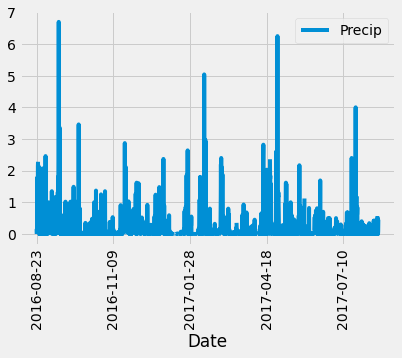

In [18]:
# Use Pandas Plotting with Matplotlib to plot the data
yearprecip_df.plot(rot= 90)


In [19]:
# Use Pandas to calcualte the summary statistics for the precipitation data
yearprecip_df.describe()

,Precip
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [21]:
# Design a query to show how many stations are available in this data
# Ask if the stations need to be unique:  
total_stations = session.query(Measurement).count()
    #filter(Measurement.station).count()
total_stations

19550

In [175]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
active_stations = session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).all()#.order_by(active_stations()).statement
active_stations # = order_by(Emoji.score.desc()).all()

[('USC00511918', 1979),
 ('USC00513117', 2709),
 ('USC00514830', 2202),
 ('USC00516128', 2612),
 ('USC00517948', 1372),
 ('USC00518838', 511),
 ('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00519523', 2669)]

In [184]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
station_obv = (Measurement.station == 'USC00519281', 
       date = dt.datetime(2016, 8, 22)
yearprecip = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date > date).\
    order_by(Measurement.date).all()
station_obv

(<sqlalchemy.sql.elements.BinaryExpression object at 0x000001446BB34CC0>,
 <sqlalchemy.sql.functions.max at 0x1446bb34e48; max>,
 <sqlalchemy.sql.functions.min at 0x1446bb34d30; min>,
 <sqlalchemy.sql.functions.Function at 0x1446bb34b00; avg>)

In [26]:
# Choose the station with the highest number of temperature observations.
busy_station = Measurement.station == 'USC00519281
date_busy = dt.datetime(2016, 8, 22)
    busy_station = session.query(Measurement.date, Measurement.prcp)
    filter(Measurement.date > date).\
print(date_busy)
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
# .hist()

SyntaxError: EOL while scanning string literal (<ipython-input-26-1fb8f61c0e5a>, line 2)

## Bonus Challenge Assignment

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
